# Analiza PKB nominalnego krajów UE (2022)

**Źródło danych:** Eurostat API – dataset `nama_10_gdp`  
**Kraje:** Polska, Niemcy, Francja  
**Jednostka:** miliony EUR (ceny bieżące)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import eurostat

In [2]:
# Download nama_10_gdp dataset
df_raw = eurostat.get_data_df('nama_10_gdp')
df_raw.head()

,freq,unit,na_item,geo\TIME_PERIOD,1975,1976,1977,1978,1979,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,A,CLV05_MEUR,B1G,AL,NaN,NaN,NaN,NaN,NaN,NaN,...,7994.8,8305.9,8592.7,8914.3,9149.4,8927.2,9540.7,10039.3,10536.5,10873.1
1,A,CLV05_MEUR,B1G,AT,NaN,NaN,NaN,NaN,NaN,NaN,...,252957.6,258221.3,264412.6,271627.6,276482.8,259477.4,271146.4,288700.8,285720.1,282992.9
2,A,CLV05_MEUR,B1G,BA,NaN,NaN,NaN,NaN,NaN,NaN,...,9351.3,9650.5,9970.4,10347.6,10642.3,10350.5,11071.9,11532.7,11768.6,12040.2
3,A,CLV05_MEUR,B1G,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,317686.5,320447.4,325019.4,331266.1,339917.3,325628.4,344167.9,358882.8,365291.4,368804.6
4,A,CLV05_MEUR,B1G,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,26119.5,26792.6,27671.7,28520.4,29501.6,28605.8,30948.9,32655.7,32993.0,33912.7


In [ ]:
# Filter for: nominal GDP (CP_MEUR), GDP at market prices (B1GQ), selected countries
countries = ['PL', 'DE', 'FR']

df_filtered = df_raw[
    (df_raw['unit'] == 'CP_MEUR') & 
    (df_raw['na_item'] == 'B1GQ') & 
    (df_raw['geo\\TIME_PERIOD'].isin(countries))
]

# Select only relevant columns - store column names in variables to avoid parsing issues
geo_col = 'geo\\TIME_PERIOD'
year_col = '2022' if '2022' in df_filtered.columns else 2022
df_gdp = df_filtered.loc[:, [geo_col, year_col]].copy()
df_gdp.columns = ['country', 'gdp_2022']

# Map country codes to full names
country_names = {'PL': 'Polska', 'DE': 'Niemcy', 'FR': 'Francja'}
df_gdp['country'] = df_gdp['country'].map(country_names)

df_gdp

,country,gdp_2022
13714,Niemcy,3989390.0
13725,Francja,2653997.2
13740,Polska,661712.3


In [4]:
print("PKB nominalne (miliony EUR) - 2022")
print(df_gdp.to_string(index=False))

PKB nominalne (miliony EUR) - 2022
country  gdp_2022
 Niemcy 3989390.0
Francja 2653997.2
 Polska  661712.3


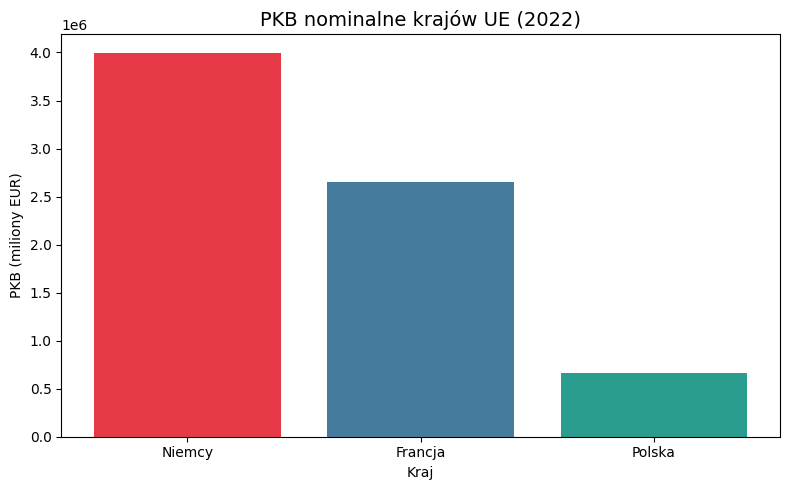

In [5]:
plt.figure(figsize=(8, 5))
plt.bar(df_gdp['country'], df_gdp['gdp_2022'], color=['#e63946', '#457b9d', '#2a9d8f'])
plt.title('PKB nominalne krajów UE (2022)', fontsize=14)
plt.ylabel('PKB (miliony EUR)')
plt.xlabel('Kraj')
plt.tight_layout()
plt.show()

In [6]:
fig = px.bar(
    df_gdp, 
    x='country', 
    y='gdp_2022',
    color='country',
    title='PKB nominalne krajów UE (2022)',
    labels={'gdp_2022': 'PKB (miliony EUR)', 'country': 'Kraj'}
)
fig.show()